# Сборный проект

Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й

# Оглавление:
1. [Открытие данных](#Шаг-1.-Открытие-файла-с-данными-и-изучение-общей-информации)
2. [Предобработка данных](#Шаг-2.-Предобработка-данных)
3. [Анализ полученных данных](#Шаг-3.-Анализ-полученных-данных)
4. [Портрет пользователя](#Шаг-4.-Составление-портрета-пользователя)
5. [Проверка гипотез](#Шаг-5-проверка-гипотез)
6. [Общий вывод](#Общий-вывод)



# Импорт библиотек

In [1]:
import pandas as pd
import numpy as np
import scipy
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
from math import factorial
import math as math

## Шаг 1. Открытие файла с данными и изучение общей информации

Изучим содержимое датафрейма

In [2]:
df=pd.read_csv('/datasets/games.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
df.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


приведем названия колонн к нижнему регистру

## Шаг 2. Предобработка данных

In [5]:
df.columns=df.columns.str.lower()

In [6]:
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


изменим тип данных у года на int

Несмотря на то что год не очень заполнять медианой,мне это нужно лишь для того.чтобы проводить операции,так как обьемы продаж игр с незаполненным годом очень низкие( Max=3.5)

In [7]:
df['year_of_release'].isnull().sum()

269

In [8]:
df['year_of_release'].median()

2007.0

In [9]:
df['year_of_release'].mean()

2006.4846163200777

заполним на 2007 год

Ранее изучил данные от года выпуска. Все игры вышедшие в пропусках имели низские продажи. Заполним их чтоб в дальнейщем просто проводит операции

In [10]:
df.dropna(subset=['year_of_release'],inplace=True)

In [11]:
df.dropna(subset=['name','genre'],inplace=True)

In [12]:
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [13]:
df['year_of_release']=df['year_of_release'].astype('int')

In [14]:
df['year_of_release'].value_counts()

2008    1427
2009    1426
2010    1255
2007    1197
2011    1136
2006    1006
2005     939
2002     829
2003     775
2004     762
2012     653
2015     606
2014     581
2013     544
2016     502
2001     482
1998     379
2000     350
1999     338
1997     289
1996     263
1995     219
1994     121
1993      60
1981      46
1992      43
1991      41
1982      36
1986      21
1983      17
1989      17
1987      16
1990      16
1988      15
1984      14
1985      14
1980       9
Name: year_of_release, dtype: int64

In [15]:
#df['year_of_release']=df['year_of_release'].astype('int')

по два пропущенных  значения в столбцах имя и жанр  заменим на то что по ним просто нет информации

In [16]:
#df['name']=df['name'].fillna('нет названия')

In [17]:
#df['genre']=df['genre'].fillna('нет названия')

глядя на оценки выясняется что tbd-еще не определенная оценка,заполнять ее средним,медианной ==> искажение данных заменим на nan

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
name               16444 non-null object
platform           16444 non-null object
year_of_release    16444 non-null int64
genre              16444 non-null object
na_sales           16444 non-null float64
eu_sales           16444 non-null float64
jp_sales           16444 non-null float64
other_sales        16444 non-null float64
critic_score       7983 non-null float64
user_score         9839 non-null object
rating             9768 non-null object
dtypes: float64(5), int64(1), object(5)
memory usage: 1.5+ MB


данные есть не для всех игр,поэтому оставим безпропускные,так как заполнить чем-то не получится ,а потом с данными оценок надо будет работать.Их важнее удалить,чтобы не изменить цели задач

In [19]:
#df=df.dropna()

In [20]:
df['critic_score']=pd.to_numeric(df['critic_score'],errors='coerce')
df['critic_score']=df['critic_score'].astype('float')

In [21]:
df['critic_score'].isnull().sum()

8461

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
name               16444 non-null object
platform           16444 non-null object
year_of_release    16444 non-null int64
genre              16444 non-null object
na_sales           16444 non-null float64
eu_sales           16444 non-null float64
jp_sales           16444 non-null float64
other_sales        16444 non-null float64
critic_score       7983 non-null float64
user_score         9839 non-null object
rating             9768 non-null object
dtypes: float64(5), int64(1), object(5)
memory usage: 1.5+ MB


In [23]:
df['user_score']=pd.to_numeric(df['user_score'],errors='coerce')

df['user_score']=df['user_score'].astype('float')

In [24]:
df['user_score'].isnull().sum()

8981

In [25]:
df['user_score'].unique()

array([8. , nan, 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, 7.4, 8.2, 9. , 7.9,
       8.1, 8.7, 7.1, 3.4, 5.3, 4.8, 3.2, 8.9, 6.4, 7.8, 7.5, 2.6, 7.2,
       9.2, 7. , 7.3, 4.3, 7.6, 5.7, 5. , 9.1, 6.5, 8.8, 6.9, 9.4, 6.8,
       6.1, 6.7, 5.4, 4. , 4.9, 4.5, 9.3, 6.2, 4.2, 6. , 3.7, 4.1, 5.8,
       5.6, 5.5, 4.4, 4.6, 5.9, 3.9, 3.1, 2.9, 5.2, 3.3, 4.7, 5.1, 3.5,
       2.5, 1.9, 3. , 2.7, 2.2, 2. , 9.5, 2.1, 3.6, 2.8, 1.8, 3.8, 0. ,
       1.6, 9.6, 2.4, 1.7, 1.1, 0.3, 1.5, 0.7, 1.2, 2.3, 0.5, 1.3, 0.2,
       0.6, 1.4, 0.9, 1. , 9.7])

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
name               16444 non-null object
platform           16444 non-null object
year_of_release    16444 non-null int64
genre              16444 non-null object
na_sales           16444 non-null float64
eu_sales           16444 non-null float64
jp_sales           16444 non-null float64
other_sales        16444 non-null float64
critic_score       7983 non-null float64
user_score         7463 non-null float64
rating             9768 non-null object
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


In [27]:
df['rating']=df['rating'].fillna(0)


Потом отфильтрую рейтинг =0 по условию

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
name               16444 non-null object
platform           16444 non-null object
year_of_release    16444 non-null int64
genre              16444 non-null object
na_sales           16444 non-null float64
eu_sales           16444 non-null float64
jp_sales           16444 non-null float64
other_sales        16444 non-null float64
critic_score       7983 non-null float64
user_score         7463 non-null float64
rating             16444 non-null object
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


In [29]:
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,0
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,0
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,0
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,0
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,0


так как tbd еще не поставленная оценка,а нам надо делать прогноз на том что есть ,то и  их удалить тоже стоит

In [30]:
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,0
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,0
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,0
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,0
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,0


In [31]:
df['user_score']=df['user_score'].astype('float')

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
name               16444 non-null object
platform           16444 non-null object
year_of_release    16444 non-null int64
genre              16444 non-null object
na_sales           16444 non-null float64
eu_sales           16444 non-null float64
jp_sales           16444 non-null float64
other_sales        16444 non-null float64
critic_score       7983 non-null float64
user_score         7463 non-null float64
rating             16444 non-null object
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


In [33]:
df['total_sales']=df['na_sales']+df['other_sales']+df['eu_sales']+df['jp_sales']

In [34]:
df['critic_score'].isnull().sum()

8461

In [35]:
df.duplicated().sum()

0

In [36]:
df=df.sort_values(by='total_sales',ascending=False)

In [37]:
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,0,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,0,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16183,Uta no * Prince-Sama: Sweet Serenade,PSP,2011,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,0,0.01
16184,Higurashi no Naku Koro ni Iki,PS3,2015,Action,0.00,0.00,0.01,0.00,NaN,NaN,0,0.01
16714,Winning Post 8 2016,PSV,2016,Simulation,0.00,0.00,0.01,0.00,NaN,NaN,0,0.01
16676,G1 Jockey 4 2008,PS3,2008,Sports,0.00,0.00,0.00,0.00,NaN,NaN,0,0.00


In [38]:
df['critic_score'].value_counts()

70.0    252
71.0    248
75.0    240
80.0    235
73.0    234
       ... 
29.0      3
20.0      3
21.0      1
13.0      1
17.0      1
Name: critic_score, Length: 81, dtype: int64

In [39]:
df['platform']=df['platform'].str.lower()

большинство пропусков  не имеют больших обьемов продаж

Нужные данные привели, по ходу буду изменять по надобности

## Шаг 3. Анализ полученных данных

In [40]:
df['year_of_release'].value_counts().sort_values(ascending=False)

2008    1427
2009    1426
2010    1255
2007    1197
2011    1136
2006    1006
2005     939
2002     829
2003     775
2004     762
2012     653
2015     606
2014     581
2013     544
2016     502
2001     482
1998     379
2000     350
1999     338
1997     289
1996     263
1995     219
1994     121
1993      60
1981      46
1992      43
1991      41
1982      36
1986      21
1983      17
1989      17
1987      16
1990      16
1988      15
1984      14
1985      14
1980       9
Name: year_of_release, dtype: int64

Данные по всем годам нам сильно не нужны.

In [41]:
#df['year_of_release']=df['year_of_release'].fillna(df['year_of_release'].median())

In [42]:
df['platform'].value_counts()

ps2     2127
ds      2121
ps3     1306
wii     1286
x360    1232
psp     1193
ps      1190
pc       957
gba      811
xb       803
gc       542
3ds      512
psv      429
ps4      392
n64      316
xone     247
snes     239
sat      173
wiiu     147
2600     116
nes       98
gb        97
dc        52
gen       27
ng        12
scd        6
ws         6
3do        3
tg16       2
pcfx       1
gg         1
Name: platform, dtype: int64

In [43]:
#df_pivot=df.groupby(['platform','year_of_release'])['total_sales'].sum()

In [44]:
df_pivot=df.pivot_table(index=['platform'],values='total_sales',aggfunc='sum')

In [45]:
df_pivot_sellings=df_pivot.sort_values(by='total_sales',ascending=False)

In [46]:
df_pivot_sellings

,total_sales
platform,
ps2,1233.56
x360,961.24
ps3,931.34
wii,891.18
ds,802.78
ps,727.58
ps4,314.14
gba,312.88
psp,289.53


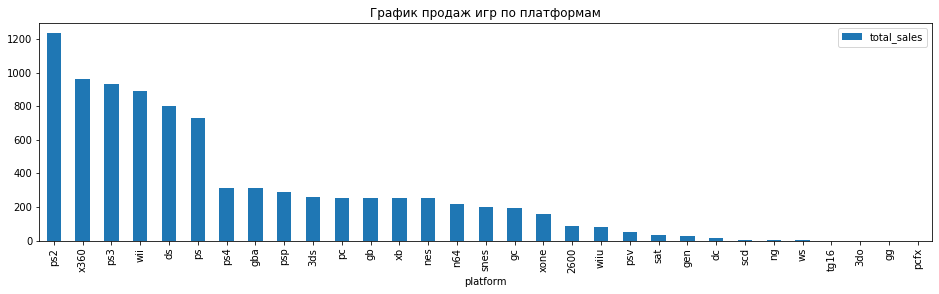

In [47]:
df_pivot_sellings.plot(kind='bar',figsize=(16,4),title='График продаж игр по платформам')

In [48]:
df.pivot_table(index=['year_of_release'],values='name',aggfunc='count')

,name
year_of_release,
1980,9
1981,46
1982,36
1983,17
1984,14
1985,14
1986,21
1987,16
1988,15


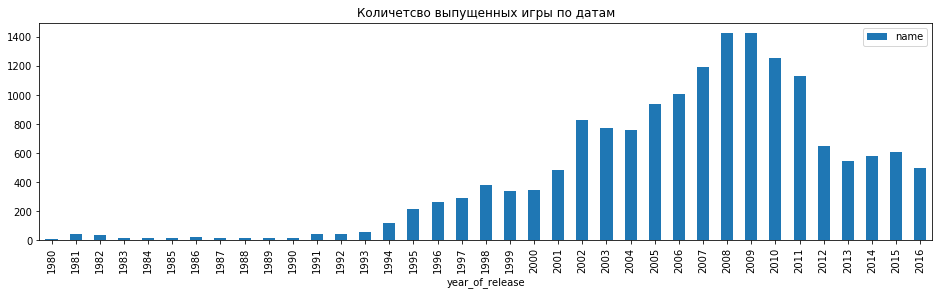

In [49]:
df_pivot_dates=df.pivot_table(
    index=['year_of_release'],values='name',aggfunc='count').plot(
    kind='bar',figsize=(16,4),title='Количетсво выпущенных игры по датам')

In [50]:
df_pivot=df.pivot_table(index=['year_of_release','platform'],values='total_sales',aggfunc='sum')

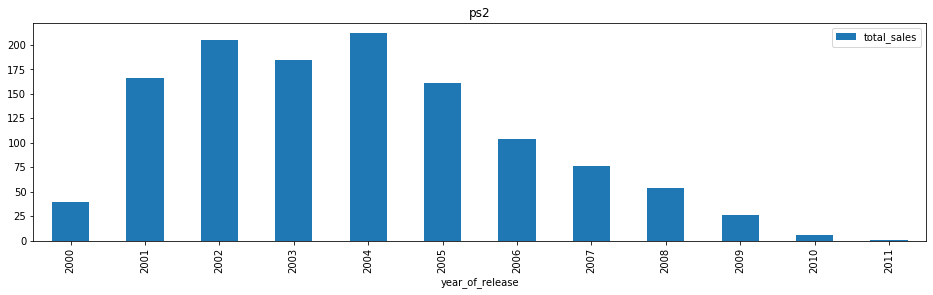

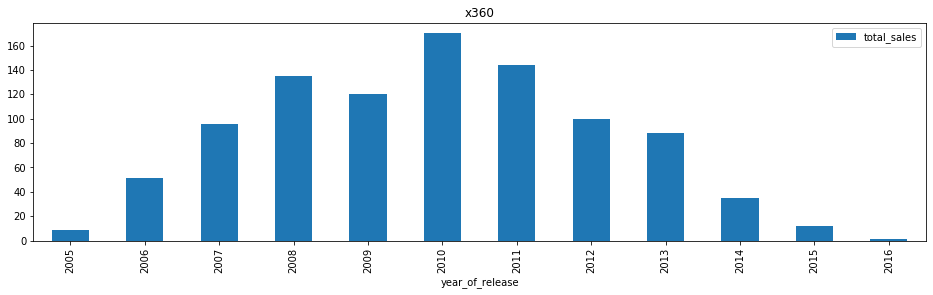

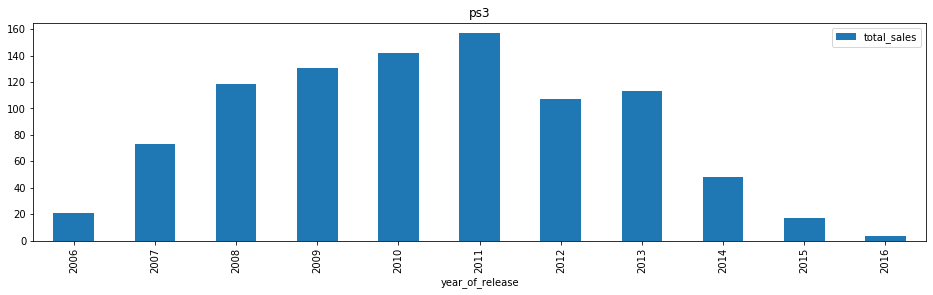

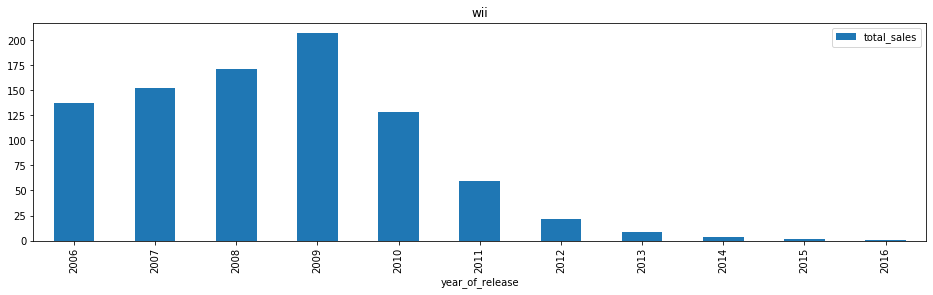

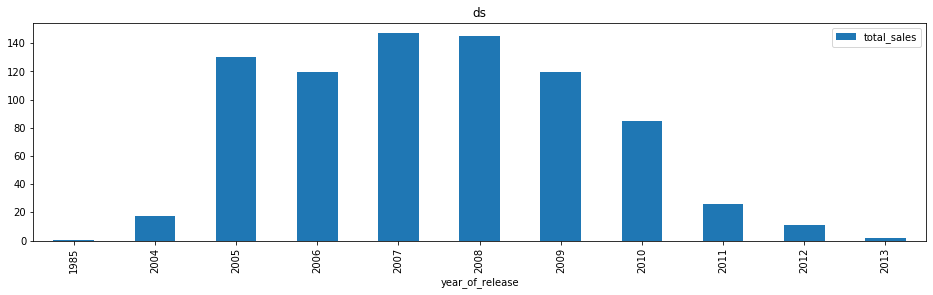

In [51]:
for platform in ['ps2','x360','ps3','wii','ds']:
    df[df['platform']==platform].pivot_table(
        index='year_of_release',values='total_sales',aggfunc='sum').plot(kind='bar',figsize=(16,4))
    plt.title(platform)

можем заметить что все нынешние топы находятся на спаде своей карьеры имея нормальное распределение

считаем что цикл платформы в 7 лет, процветание на 3-4 год наблюдается

In [52]:
df_pivot.sort_values(by=['platform','total_sales','year_of_release'],ascending=False)

,,total_sales
year_of_release,platform,
2015,xone,60.14
2014,xone,54.07
2016,xone,26.15
2013,xone,18.96
2004,xb,65.42
...,...,...
1988,2600,0.74
1986,2600,0.67
1989,2600,0.63


Консоли ведут борьбу между собой, ps 4 заметно выйгрывает ,современность модели решает

### Выбор актуального периода

в среднем консоли меняют друг друга каждые 5-7 лет поэтому прогноз 2017 года будем основывать на выборке за период 2012-2015 года (некоторые игры еще  могут быть актуальны несмотря на год выпуска,но на продажи сильно не повлияют)

In [53]:
df_games_1=df.query(' 2012<= year_of_release <=2015 ')

In [54]:
df_games_1['year_of_release'].unique()

array([2013, 2015, 2012, 2014])

In [55]:
df_games_1

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,ps3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,x360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,ps4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,0,14.63
33,Pokemon X/Pokemon Y,3ds,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,0,14.60
34,Call of Duty: Black Ops II,ps3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79
...,...,...,...,...,...,...,...,...,...,...,...,...
16171,Infinite Stratos 2: Love and Purge,psv,2015,Action,0.00,0.00,0.01,0.00,NaN,NaN,0,0.01
16185,The Legend of Heroes: Trails in the Sky Third ...,ps3,2013,Role-Playing,0.00,0.00,0.01,0.00,NaN,NaN,0,0.01
16175,Psycho-Pass,xone,2014,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,0,0.01
16179,Pro Angler Moves,ps3,2012,Sports,0.01,0.00,0.00,0.00,NaN,NaN,E,0.01


In [56]:
df_games_1=df_games_1.query('critic_score != "nan"')
df_games_1=df_games_1.query('user_score != "nan"')
df_games_1['critic_score']=df_games_1['critic_score'].astype('float')
df_games_1['user_score']=df_games_1['user_score'].astype('float')

In [57]:
df_games_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1070 entries, 16 to 16168
Data columns (total 12 columns):
name               1070 non-null object
platform           1070 non-null object
year_of_release    1070 non-null int64
genre              1070 non-null object
na_sales           1070 non-null float64
eu_sales           1070 non-null float64
jp_sales           1070 non-null float64
other_sales        1070 non-null float64
critic_score       1070 non-null float64
user_score         1070 non-null float64
rating             1070 non-null object
total_sales        1070 non-null float64
dtypes: float64(7), int64(1), object(4)
memory usage: 108.7+ KB


In [58]:
games_pivot=df_games_1.pivot_table(index=['platform','year_of_release',],values='total_sales',aggfunc='sum')

In [59]:
games_pivot

total_sales
platform year_of_release             
3ds      2012                   39.39
         2013                   15.89
         2014                   11.49
         2015                   10.55
ds       2012                    1.02
pc       2012                   22.01
         2013                   10.98
         2014                   11.74
         2015                    7.18
ps3      2012                   94.30
         2013                  102.70
         2014                   11.34
         2015                    0.02
ps4      2013                   25.07
         2014                   80.95
         2015                   80.90
psp      2013                    0.15
psv      2012                   13.07
         2013                    5.96
         2014                    5.27
         2015                    1.72
wii      2012                   13.23
wiiu     2012                   14.85
         2013                   17.40
         2014                   15.22
         2015                   15.35
x360     2012                   95.68
         2013                   75.17
         2014                   10.10
xone     2013                   14.92
         2014                   47.01
         2015                   44.58

по сводной таблице сделаем распределения также как и раньше, чтобы определить кто находится на подъеме

чтобы не делать очередные гистограммы достаточно увидеть тенденцию спада/подъема в продажах.
их имеют следующие платформы:ps4 xone на подъеме а также включим pc средне держится  и wiiu и 3dc идущие на спад но не достигшие его и ожадиющие новые модели, что может говорить о сохраниении покупателей при переприобретении новых моделей(предположение)

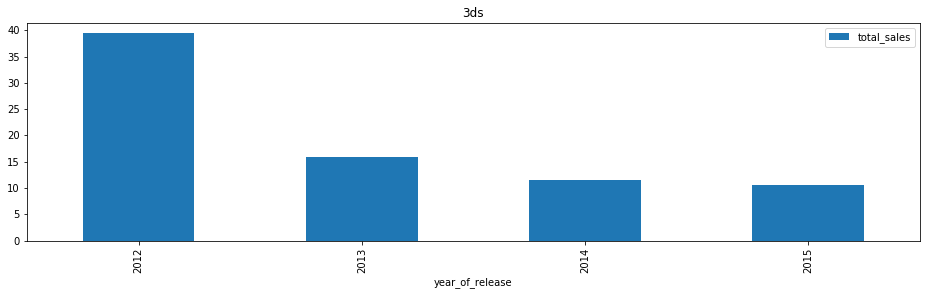

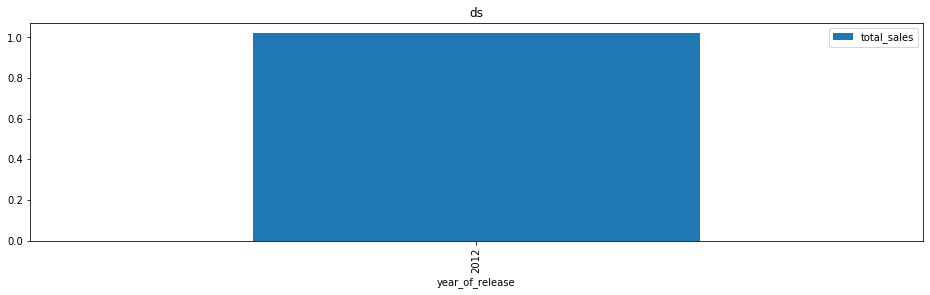

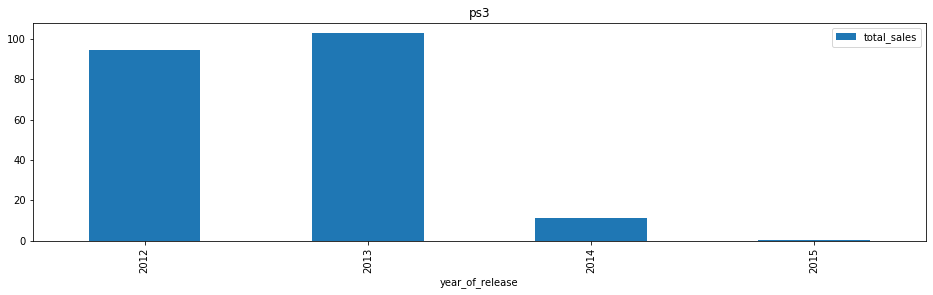

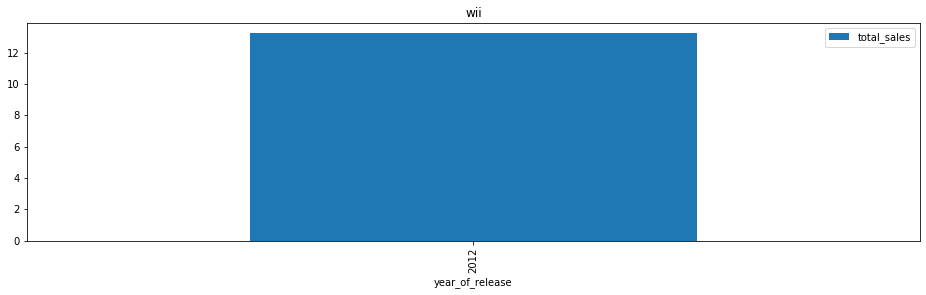

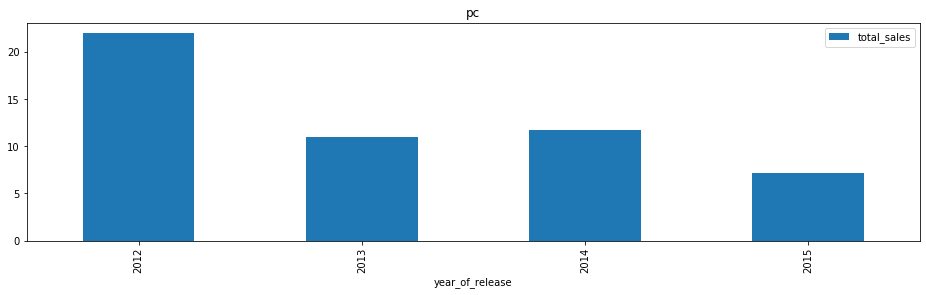

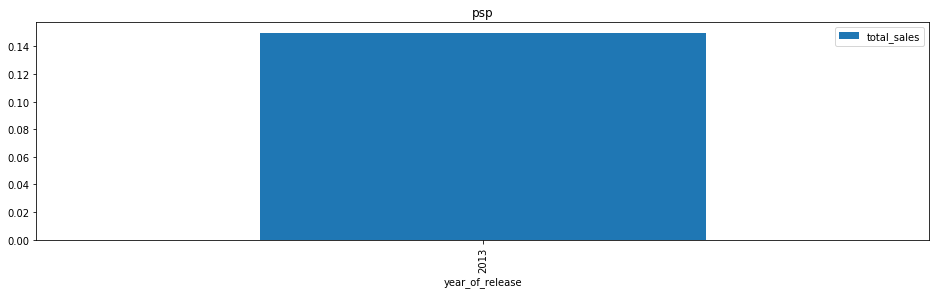

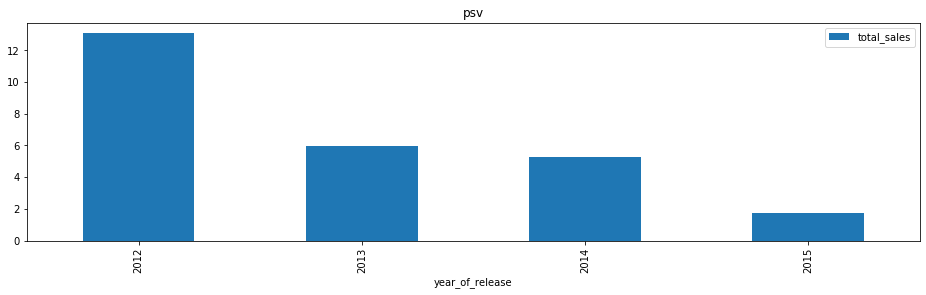

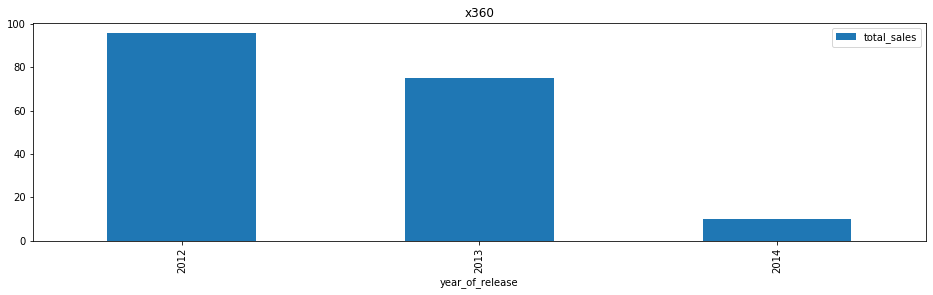

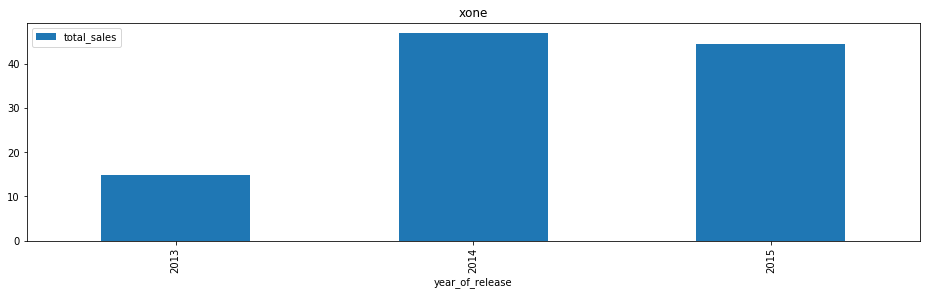

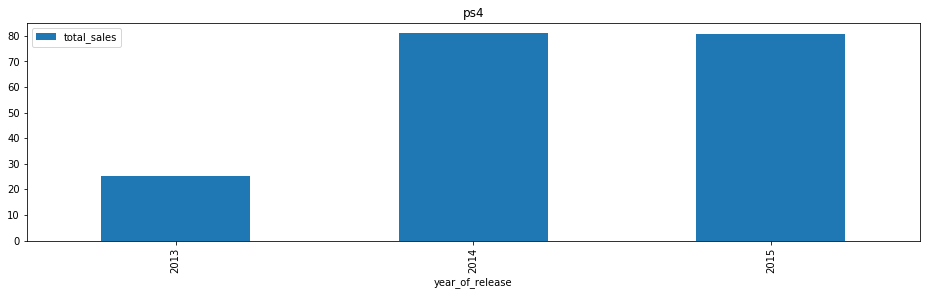

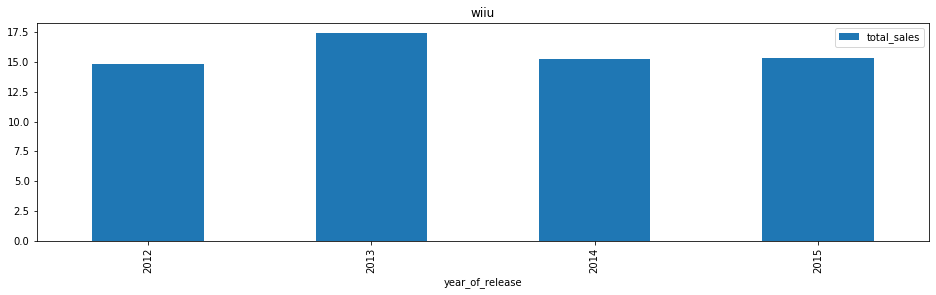

In [60]:
for platform in ['3ds','ds','ps3','wii','pc','psp','psv','x360','xone','ps4','wiiu']:
    df_games_1[df_games_1['platform']==platform].pivot_table(
        index='year_of_release',values='total_sales',aggfunc='sum').plot(kind='bar',figsize=(16,4))
    plt.title(platform)

#df_games_1.pivot_table(index=['platform','year_of_release',],values='total_sales',aggfunc='sum').

In [61]:
final=df_games_1.query('platform in ("ps4","xone","pc","wiiu","3ds")')

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


(0, 2.8)

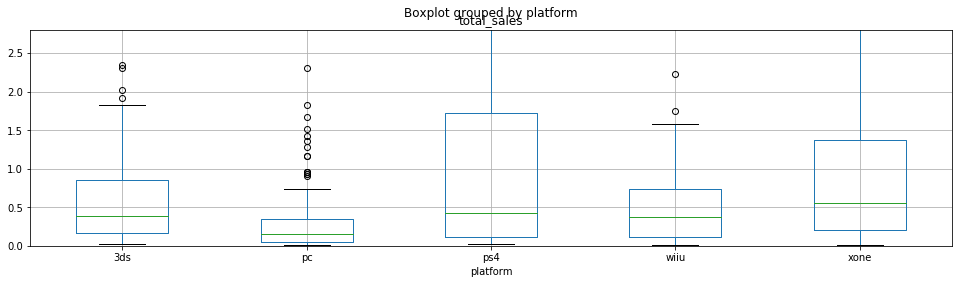

In [62]:
(final.boxplot(column='total_sales',by='platform',figsize=(16,4))
)
plt.ylim(0, 2.8)


Самые большие объемы продаж идут на ps4 и xone  они то наши главные опоры на верный прогноз

Отфифльтруем нановские занчения и значения тбд в таблице

In [63]:
final

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
42,Grand Theft Auto V,ps4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
62,New Super Mario Bros. 2,3ds,2012,Platform,3.66,3.14,2.47,0.63,78.0,7.2,E,9.90
73,Animal Crossing: New Leaf,3ds,2012,Simulation,2.03,2.36,4.39,0.39,88.0,8.7,E,9.17
77,FIFA 16,ps4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
92,Call of Duty: Advanced Warfare,ps4,2014,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66
...,...,...,...,...,...,...,...,...,...,...,...,...
16597,Saints Row: Gat out of Hell,xone,2015,Action,0.00,0.01,0.00,0.00,65.0,6.0,M,0.01
16584,Transformers: Fall of Cybertron,pc,2012,Action,0.01,0.00,0.00,0.00,78.0,7.9,T,0.01
16088,Contrast,pc,2013,Platform,0.00,0.01,0.00,0.00,62.0,7.7,T,0.01
16062,DuckTales: Remastered,pc,2013,Action,0.00,0.01,0.00,0.00,66.0,7.6,E,0.01


In [64]:
final.isnull().sum()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
total_sales        0
dtype: int64

In [65]:
final['rating'].value_counts()

M       181
E       134
T       126
E10+    118
0        24
Name: rating, dtype: int64

In [66]:
final=final.query('rating != "nan"')

In [67]:
final['critic_score'].unique()

array([97., 78., 88., 82., 83., 87., 76., 81., 84., 86., 77., 93., 80.,
       85., 92., 70., 72., 75., 91., 66., 73., 89., 90., 79., 74., 71.,
       57., 65., 54., 63., 61., 64., 60., 59., 69., 96., 62., 95., 67.,
       94., 68., 56., 58., 47., 46., 31., 55., 32., 43., 53., 23., 51.,
       36., 45., 38., 24., 39., 19., 50., 20., 33., 42., 52., 25., 48.,
       49., 26., 40.])

In [68]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 583 entries, 42 to 16168
Data columns (total 12 columns):
name               583 non-null object
platform           583 non-null object
year_of_release    583 non-null int64
genre              583 non-null object
na_sales           583 non-null float64
eu_sales           583 non-null float64
jp_sales           583 non-null float64
other_sales        583 non-null float64
critic_score       583 non-null float64
user_score         583 non-null float64
rating             583 non-null object
total_sales        583 non-null float64
dtypes: float64(7), int64(1), object(4)
memory usage: 59.2+ KB


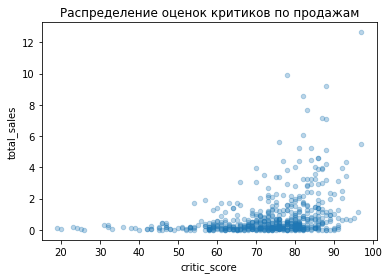

In [69]:
final.plot(x='critic_score', y='total_sales', kind='scatter', alpha=0.3,title='Распределение оценок критиков по продажам') 

основное скопление оценок от 60 до 80 и в этих местах продаж наблюдается больше

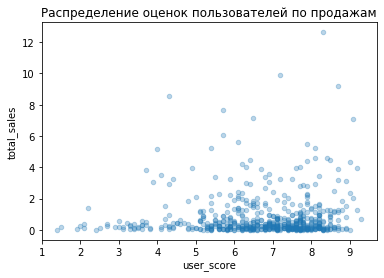

In [70]:
final.plot(x='user_score', y='total_sales', kind='scatter', alpha=0.3,title='Распределение оценок пользователей по продажам') 

аналогично что чем выше оценка пользователя,тем больше количество  продаж 

In [71]:
print(final['critic_score'].corr(final['total_sales']),final['user_score'].corr(final['total_sales']))

0.3284908000275357 0.06649108780531533


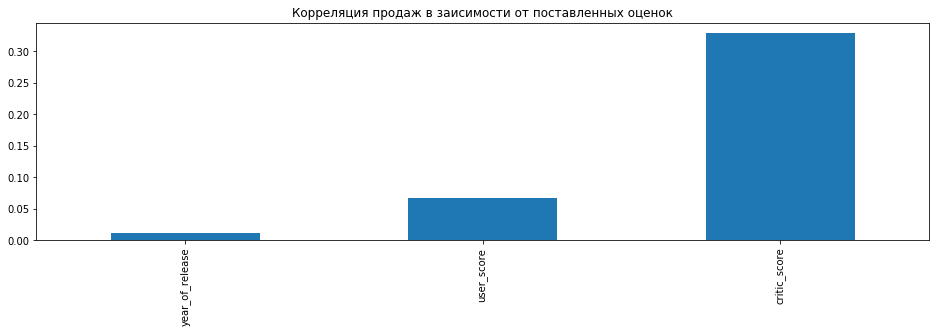

In [72]:
dependance=final.corr()['total_sales'].sort_values(ascending=True)
dependance.drop(['total_sales','na_sales','other_sales','eu_sales','jp_sales'], inplace=True)
dependance.plot(y=(0,1),kind='bar',figsize=(16,4),title='Корреляция продаж в заисимости от поставленных оценок')


зависимость слабая между продажами и рейтингами 

In [73]:
df_games_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1070 entries, 16 to 16168
Data columns (total 12 columns):
name               1070 non-null object
platform           1070 non-null object
year_of_release    1070 non-null int64
genre              1070 non-null object
na_sales           1070 non-null float64
eu_sales           1070 non-null float64
jp_sales           1070 non-null float64
other_sales        1070 non-null float64
critic_score       1070 non-null float64
user_score         1070 non-null float64
rating             1070 non-null object
total_sales        1070 non-null float64
dtypes: float64(7), int64(1), object(4)
memory usage: 108.7+ KB


### Соотнесение выводов с продажами игр на других платформах.

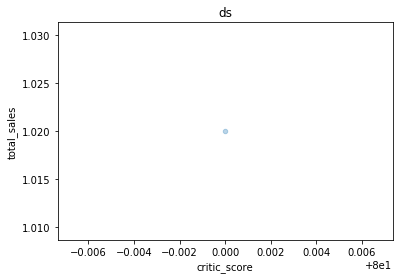

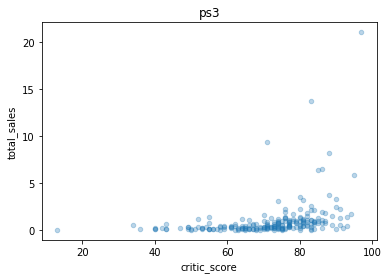

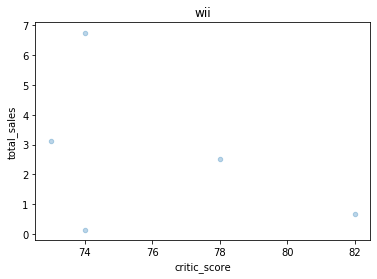

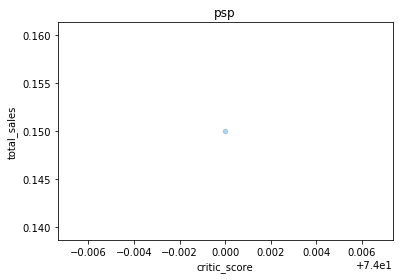

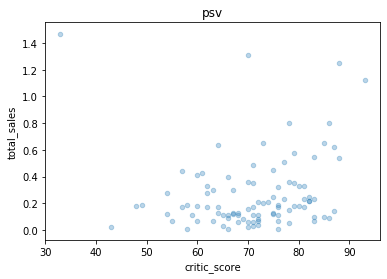

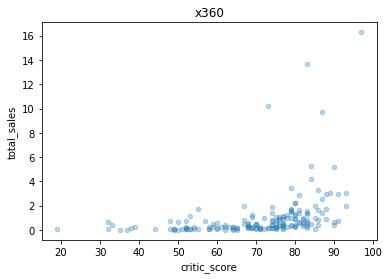

In [74]:
for platform in ['ds','ps3','wii','psp','psv','x360']:
    df_games_1[df_games_1['platform']==platform].plot(kind='scatter',x='critic_score', y='total_sales',alpha=0.3)
    plt.title(platform)


--- psp с ds вообще не продавалась и продажи от рейтинга зависели также слабо


- Но отличие в продажах довольное сильное  в нашем актуальном периоде psp wii и ds  вообще не выпускали/продавали игры 
- остальные платформы имеют меньшее количество продаж чем наши
- явно выбрали нужные нам платформы

### Общее распределение игр по жанрам.

In [75]:
final.isnull().sum()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
total_sales        0
dtype: int64

In [76]:
final

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
42,Grand Theft Auto V,ps4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
62,New Super Mario Bros. 2,3ds,2012,Platform,3.66,3.14,2.47,0.63,78.0,7.2,E,9.90
73,Animal Crossing: New Leaf,3ds,2012,Simulation,2.03,2.36,4.39,0.39,88.0,8.7,E,9.17
77,FIFA 16,ps4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
92,Call of Duty: Advanced Warfare,ps4,2014,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66
...,...,...,...,...,...,...,...,...,...,...,...,...
16597,Saints Row: Gat out of Hell,xone,2015,Action,0.00,0.01,0.00,0.00,65.0,6.0,M,0.01
16584,Transformers: Fall of Cybertron,pc,2012,Action,0.01,0.00,0.00,0.00,78.0,7.9,T,0.01
16088,Contrast,pc,2013,Platform,0.00,0.01,0.00,0.00,62.0,7.7,T,0.01
16062,DuckTales: Remastered,pc,2013,Action,0.00,0.01,0.00,0.00,66.0,7.6,E,0.01


In [77]:
final['genre'].unique()

array(['Action', 'Platform', 'Simulation', 'Sports', 'Shooter',
       'Role-Playing', 'Racing', 'Misc', 'Fighting', 'Strategy',
       'Adventure', 'Puzzle'], dtype=object)

Text(0, 0.5, 'Total_sales')

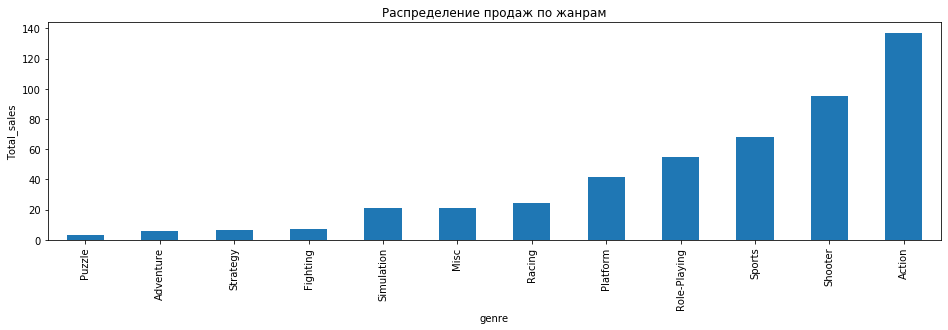

In [78]:
genre_graph=final.groupby('genre')['total_sales'].sum()
genre_graph = genre_graph.sort_values()
genre_graph.plot(kind='bar',figsize=(16,4),y='total_sales',title='Распределение продаж по жанрам')
plt.ylabel('Total_sales')


- можем заметить что продажи экшн игр самые большие,а пазл приключения маленькие
- самые популярные жанры shooter and action тенденция их популярности в принципе наблюдается

### Шаг 4.Составление портрета пользователя

In [79]:
final.rename(columns={'na_sales':'america','eu_sales':'europe','jp_sales':'japan'},inplace=True)

In [80]:
final

,name,platform,year_of_release,genre,america,europe,japan,other_sales,critic_score,user_score,rating,total_sales
42,Grand Theft Auto V,ps4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
62,New Super Mario Bros. 2,3ds,2012,Platform,3.66,3.14,2.47,0.63,78.0,7.2,E,9.90
73,Animal Crossing: New Leaf,3ds,2012,Simulation,2.03,2.36,4.39,0.39,88.0,8.7,E,9.17
77,FIFA 16,ps4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
92,Call of Duty: Advanced Warfare,ps4,2014,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66
...,...,...,...,...,...,...,...,...,...,...,...,...
16597,Saints Row: Gat out of Hell,xone,2015,Action,0.00,0.01,0.00,0.00,65.0,6.0,M,0.01
16584,Transformers: Fall of Cybertron,pc,2012,Action,0.01,0.00,0.00,0.00,78.0,7.9,T,0.01
16088,Contrast,pc,2013,Platform,0.00,0.01,0.00,0.00,62.0,7.7,T,0.01
16062,DuckTales: Remastered,pc,2013,Action,0.00,0.01,0.00,0.00,66.0,7.6,E,0.01


In [81]:
final.groupby(['platform','genre'])['america'].sum().map('{:.1%}'.format)

platform  genre       
3ds       Action          1033.0%
          Adventure         51.0%
          Fighting          18.0%
          Misc             131.0%
          Platform         539.0%
          Puzzle            38.0%
          Role-Playing     644.0%
          Simulation       275.0%
          Sports            41.0%
          Strategy          14.0%
pc        Action           373.0%
          Adventure          0.0%
          Fighting           1.0%
          Platform           0.0%
          Racing             5.0%
          Role-Playing     552.0%
          Shooter          382.0%
          Simulation       155.0%
          Sports             7.0%
          Strategy         169.0%
ps4       Action          2270.0%
          Adventure         58.0%
          Fighting         181.0%
          Misc             115.0%
          Platform         169.0%
          Puzzle             0.0%
          Racing           194.0%
          Role-Playing     506.0%
          Shooter        

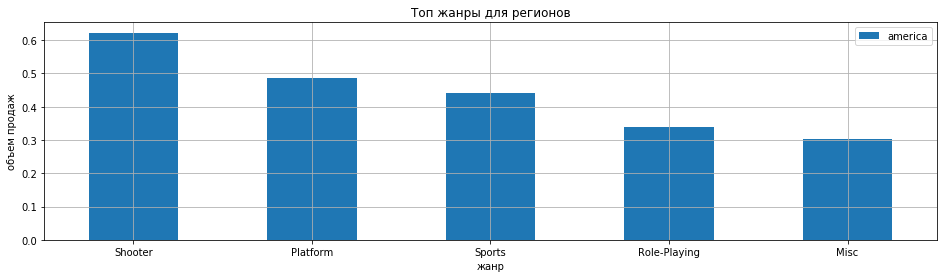

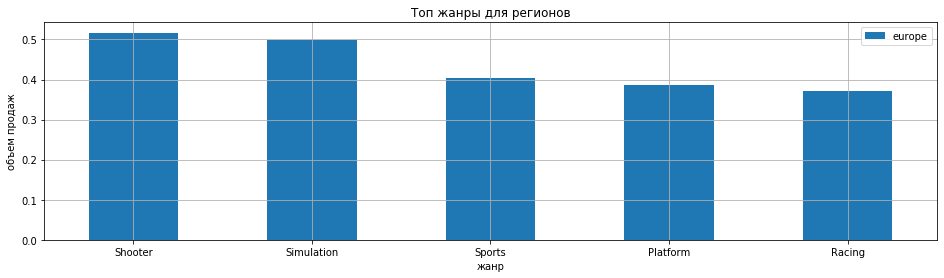

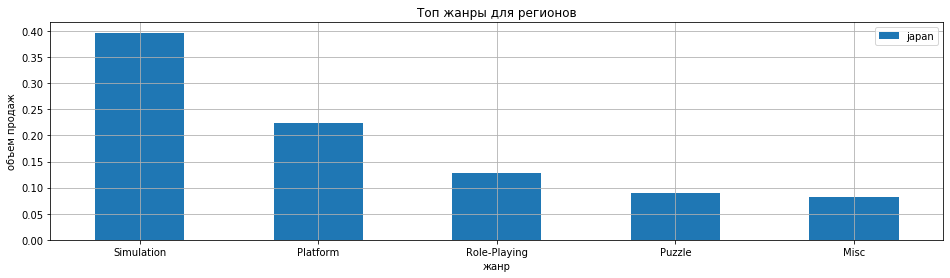

In [82]:
for d in ['america','europe','japan']:
    (
        final
        .pivot_table(index='genre',values=d,aggfunc='mean')
        .sort_values(by= d,ascending=False)
        .head(5)
        .plot(kind='bar',grid=True,figsize=(16,4),rot=360)
        
    )
    plt.legend([d])
    plt.xlabel('жанр')
    plt.ylabel('объем продаж')
    plt.title('Топ жанры для регионов')
    plt.show()
    
    

Можем увидеть что для америки и европы, шутеры в топе,а у японии- гонки

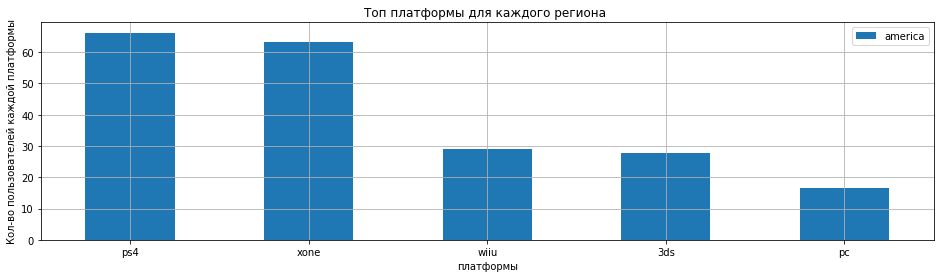

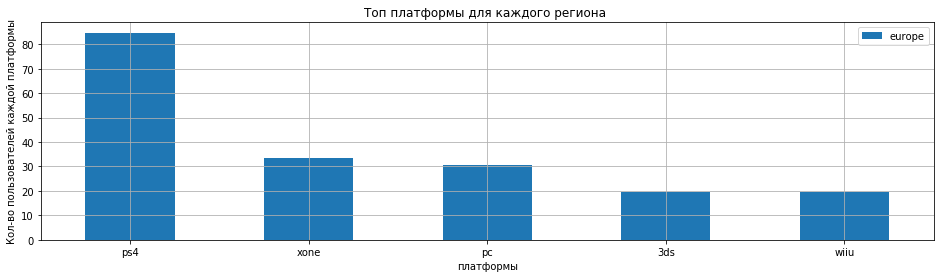

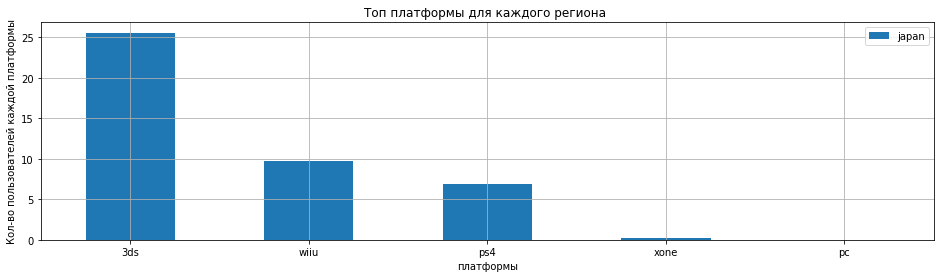

In [83]:
for d in ['america','europe','japan']:
    (
        final
        .pivot_table(index='platform',values=d,aggfunc='sum')
        .sort_values(by= d,ascending=False)
        .head(5)
        .plot(kind='bar',grid=True,figsize=(16,4),rot=360)
        
    )
    plt.legend([d])
    plt.xlabel('платформы')
    plt.ylabel('Кол-во пользователей каждой платформы')
    plt.title('Топ платформы для каждого региона ')
    plt.show()
    
    

В америке и европе топ-платформы похожи,а у японии свои консоли в почете

In [84]:
final

,name,platform,year_of_release,genre,america,europe,japan,other_sales,critic_score,user_score,rating,total_sales
42,Grand Theft Auto V,ps4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
62,New Super Mario Bros. 2,3ds,2012,Platform,3.66,3.14,2.47,0.63,78.0,7.2,E,9.90
73,Animal Crossing: New Leaf,3ds,2012,Simulation,2.03,2.36,4.39,0.39,88.0,8.7,E,9.17
77,FIFA 16,ps4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
92,Call of Duty: Advanced Warfare,ps4,2014,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66
...,...,...,...,...,...,...,...,...,...,...,...,...
16597,Saints Row: Gat out of Hell,xone,2015,Action,0.00,0.01,0.00,0.00,65.0,6.0,M,0.01
16584,Transformers: Fall of Cybertron,pc,2012,Action,0.01,0.00,0.00,0.00,78.0,7.9,T,0.01
16088,Contrast,pc,2013,Platform,0.00,0.01,0.00,0.00,62.0,7.7,T,0.01
16062,DuckTales: Remastered,pc,2013,Action,0.00,0.01,0.00,0.00,66.0,7.6,E,0.01


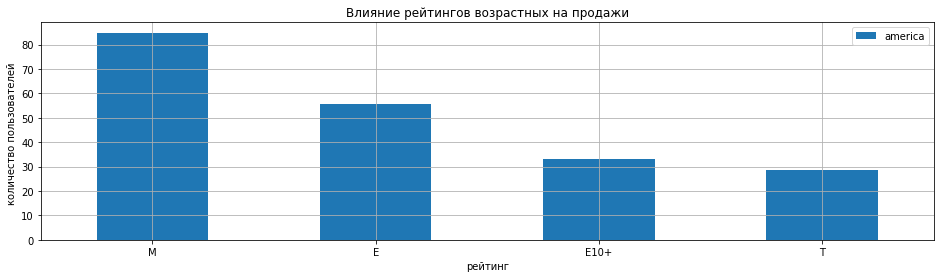

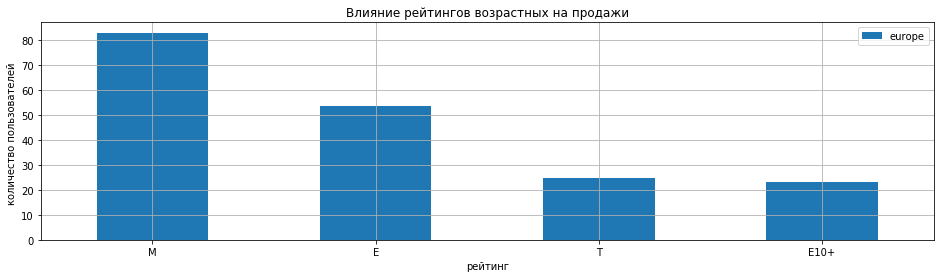

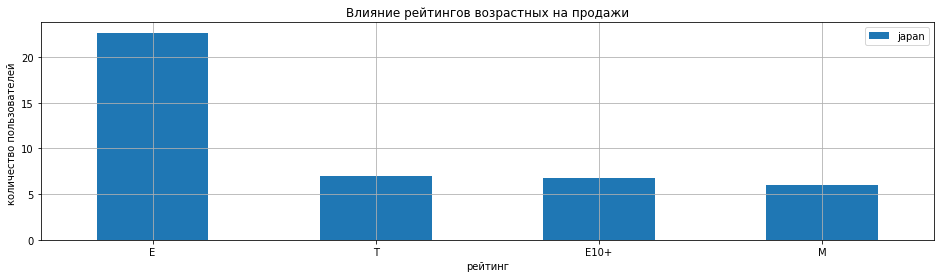

In [85]:
for d in ['america','europe','japan']:
    (
        final.loc[final['rating']!=0]
        .pivot_table(index='rating',values=d,aggfunc='sum')
        .sort_values(by= d,ascending=False)
        .head(5)
        .plot(kind='bar',grid=True,figsize=(16,4),rot=360)
        
    )
    plt.legend([d])
    plt.xlabel('рейтинг')
    plt.ylabel('количество пользователей ')
    plt.title('Влияние рейтингов возрастных на продажи')
    plt.show()

- Продажи от рейтинга зависят от масс. для японии выгодней продвигать рейтинг E в дальнейшем
- Евпропе и Америке рейтинг M и E


p.s- m-mature - взрослые e -early- дети

У японцев в почете собственные платформы,в америке - борьба пс4 и xone  а в европе доминация ps4

### Шаг-5-проверка-гипотез

#### 1.Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Проверим первую гипотезу того что:Средние пользовательские рейтинги платформ Xbox One и PC одинаковые - она будет нашей нулевой
соответсвенно,алтернативная- Средние пользовательские рейтинги платформ Xbox One и PC разные

In [86]:
final

,name,platform,year_of_release,genre,america,europe,japan,other_sales,critic_score,user_score,rating,total_sales
42,Grand Theft Auto V,ps4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
62,New Super Mario Bros. 2,3ds,2012,Platform,3.66,3.14,2.47,0.63,78.0,7.2,E,9.90
73,Animal Crossing: New Leaf,3ds,2012,Simulation,2.03,2.36,4.39,0.39,88.0,8.7,E,9.17
77,FIFA 16,ps4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
92,Call of Duty: Advanced Warfare,ps4,2014,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66
...,...,...,...,...,...,...,...,...,...,...,...,...
16597,Saints Row: Gat out of Hell,xone,2015,Action,0.00,0.01,0.00,0.00,65.0,6.0,M,0.01
16584,Transformers: Fall of Cybertron,pc,2012,Action,0.01,0.00,0.00,0.00,78.0,7.9,T,0.01
16088,Contrast,pc,2013,Platform,0.00,0.01,0.00,0.00,62.0,7.7,T,0.01
16062,DuckTales: Remastered,pc,2013,Action,0.00,0.01,0.00,0.00,66.0,7.6,E,0.01


In [87]:
xone=final.loc[final['platform']=='xone','user_score']

In [88]:
pc=final.loc[final['platform']=='pc','user_score']

In [89]:
print(xone,pc)

165      7.9
179      5.4
242      6.4
270      6.2
373      4.1
        ... 
13643    8.9
14478    5.4
15618    6.6
15860    7.2
16597    6.0
Name: user_score, Length: 107, dtype: float64 192      4.0
458      3.9
688      7.9
959      4.8
1095     7.9
        ... 
16692    7.6
16584    7.9
16088    7.7
16062    7.6
16168    7.7
Name: user_score, Length: 152, dtype: float64


In [90]:
np.var(xone)

1.6672512883221242

In [91]:
np.var(pc)

2.5800653566481997

In [92]:
st.levene(xone.dropna(), pc.dropna())

LeveneResult(statistic=5.787043239573586, pvalue=0.01685175821118009)

значения двух выборок близкие сделаю порогове значение a= 0.01

p-значение для теста левина <0.05 ,equal_var=False,следовательно  равеноство десперсий отсутсвует

In [93]:
pc=final.loc[final['platform']=='pc','user_score']
xone=final.loc[final['platform']=='xone','user_score']
alpha=0.01

results = st.ttest_ind(xone,pc,equal_var=False,nan_policy = 'omit')
print('p-значение:',results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.8742634226984017
Не получилось отвергнуть нулевую гипотезу


Из самих средних оценок видно,что одни значения попоадают в другие,и как мы видим по p значению,очень сильно 
и с большой вероятностью==> зависимость не случайная,а значит нулевая гипотеза "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые" имеет место быть 


#### 2.Средние пользовательские рейтинги жанров Action и Sports разные.

H0=.Средние пользовательские рейтинги жанров Action и Sports разные.


h1=Средние пользовательские рейтинги жанров Action и Sports одинаковые.

In [94]:
final

,name,platform,year_of_release,genre,america,europe,japan,other_sales,critic_score,user_score,rating,total_sales
42,Grand Theft Auto V,ps4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
62,New Super Mario Bros. 2,3ds,2012,Platform,3.66,3.14,2.47,0.63,78.0,7.2,E,9.90
73,Animal Crossing: New Leaf,3ds,2012,Simulation,2.03,2.36,4.39,0.39,88.0,8.7,E,9.17
77,FIFA 16,ps4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
92,Call of Duty: Advanced Warfare,ps4,2014,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66
...,...,...,...,...,...,...,...,...,...,...,...,...
16597,Saints Row: Gat out of Hell,xone,2015,Action,0.00,0.01,0.00,0.00,65.0,6.0,M,0.01
16584,Transformers: Fall of Cybertron,pc,2012,Action,0.01,0.00,0.00,0.00,78.0,7.9,T,0.01
16088,Contrast,pc,2013,Platform,0.00,0.01,0.00,0.00,62.0,7.7,T,0.01
16062,DuckTales: Remastered,pc,2013,Action,0.00,0.01,0.00,0.00,66.0,7.6,E,0.01


In [95]:
final['genre']=final['genre'].str.lower()

In [96]:
action=final.loc[final['genre']=='action','user_score']


In [97]:
action.mean()

6.917857142857144

In [98]:
sports=final.loc[final['genre']=='sports','user_score']
sports.mean()

5.585294117647059

In [99]:
np.var(action)

1.6097321428571432

In [100]:
np.var(sports)

2.282136678200692

In [101]:
st.levene(sports.dropna(), action.dropna())

LeveneResult(statistic=2.375469947746087, pvalue=0.12446139721336832)

equal_var =True потому что p-value>0.05( является равным 0.09) дисперсии могут быть равны

In [102]:
action=final.loc[final['genre']=='action','user_score']
sports=final.loc[final['genre']=='sports','user_score']
alpha=0.01
results= st.ttest_ind(action,sports,equal_var=True,nan_policy = 'omit')

print('p-значение:',results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.457284732112607e-11
Отвергаем нулевую гипотезу


так как тут равенство дисперсий и p-value  доходит  до порогового значения. то считаем что отвергнутая гипотеза "Средние пользовательские рейтинги жанров Action и Sports разные."--отклонена

нас будет интересовать  гипотеза альтернативная -h1=Средние пользовательские рейтинги жанров Action и Sports одинаковые.

##### подвывод по гипотезам:

альтернативные гипотезы формировались противоположным высказыванием.
статитстические тесты были следующие - стьюдента  на проверку гипотезы и левина на равенство дисперсий

# Общий вывод

 Нами был исследован рынок игр на разных платформах и в разных регионах.В ходе прохождения работы вычислили и выявили ряд как закономерностей так и независимых явлений.
 
 Ключевые значения которые нас интересовали это количество проданных игр по регионам,по миру,по платформам.Составили следующие выводы:
 
 - часть данных не учитывались в силу отсутсвия информации по рейтингам и году
 - посчитали суммарные продажи
 - посмотрели темпы продаж по платформам 
 -  далее мы из генеральной совокупности собирали выборку(актуальный период) нужных нам данных по соотвествующим критериям
 - из ряда платформ предоставленных нам,выбрали 5 актуальных находящихся на пике,или тех,которые дадут еще немного денег,прежде чем перезапустятся
 - проверили две гипотезы и выяснили:
 
 --- средние рейтинги xbox и pc одинаковые - не Была отвергнута,а значит пока можно считать что это так.
 --- средние пользовательские рейтинги жанров Action и Sports разные- было опровергнуто, а значит рейтинги спорта и экшн могут быть одинаковыми.
 # На основании этих данных прогноз:
 

- Выгодные платформы ps4, xone ,pc, wiiu ,3ds 


---- для америки (ps4 ,xone ,pc)-ps 4 приоритет 


---- для европы (ps4,xone)- ps4 приоритет 


----для японии(их консоли: wiiu, 3ds,ps4)-нинтендо(3ds) приоритет


- популярные жанры 
Action,Shooter,Sport
- делать игры для детей или 18+
 